In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data = pd.read_csv(r'Data\Teams.csv')

In [5]:
data.shape

(2805, 48)

In [6]:
data.head(2)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1


In [7]:
# Only getting data from National and American League
data = data.query("lgID in ('NL', 'AL')")
data.shape

(2634, 48)

In [8]:
pd.set_option('display.max_columns', None)
data.head(5)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,DivWin,WCWin,LgWin,WSWin,R,AB,H,2B,3B,HR,BB,SO,SB,CS,HBP,SF,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
50,1876,NL,BSN,ATL,NaN,4,70,NaN,39,31,NaN,NaN,N,NaN,471,2722,723,96,24,9,58,98.0,NaN,NaN,NaN,NaN,450,176,2.51,49,3,7,1896,732,7,104,77,422,42.0,0.86,Boston Red Caps,South End Grounds I,NaN,102,98,BSN,BSN,BSN
51,1876,NL,CHN,CHC,NaN,1,66,NaN,52,14,NaN,NaN,Y,NaN,624,2748,926,131,32,8,70,45.0,NaN,NaN,NaN,NaN,257,116,1.76,59,9,4,1776,608,6,29,51,282,33.0,0.89,Chicago White Stockings,23rd Street Grounds,NaN,112,106,CHC,CHN,CHN
52,1876,NL,CN1,CNR,NaN,8,65,NaN,9,56,NaN,NaN,N,NaN,238,2372,555,51,12,4,41,136.0,NaN,NaN,NaN,NaN,579,238,3.62,57,0,0,1773,850,9,34,60,469,45.0,0.84,Cincinnati Reds,Avenue Grounds,NaN,86,95,CIN,CN1,CN1
53,1876,NL,HAR,HAR,NaN,2,69,NaN,47,21,NaN,NaN,N,NaN,429,2664,711,96,22,2,39,78.0,NaN,NaN,NaN,NaN,261,116,1.67,69,11,0,1872,570,2,27,114,337,27.0,0.88,Hartford Dark Blues,Hartford Ball Club Grounds,NaN,110,106,HAR,HAR,HAR
54,1876,NL,LS1,LGR,NaN,5,69,NaN,30,36,NaN,NaN,N,NaN,280,2570,641,68,14,6,24,98.0,NaN,NaN,NaN,NaN,344,121,1.69,67,5,0,1929,605,3,38,125,396,44.0,0.87,Louisville Grays,Louisville Baseball Park,NaN,117,117,LOU,LS1,LS1


In [9]:
data.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
G                   int64
Ghome             float64
W                   int64
L                   int64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
R                   int64
AB                  int64
H                   int64
2B                  int64
3B                  int64
HR                  int64
BB                  int64
SO                float64
SB                float64
CS                float64
HBP               float64
SF                float64
RA                  int64
ER                  int64
ERA               float64
CG                  int64
SHO                 int64
SV                  int64
IPouts              int64
HA                  int64
HRA                 int64
BBA                 int64
SOA                 int64
E                   int64
DP          

In [10]:
data.isna().sum()

yearID               0
lgID                 0
teamID               0
franchID             0
divID             1346
Rank                 0
G                    0
Ghome              228
W                    0
L                    0
DivWin            1374
WCWin             2010
LgWin               28
WSWin              248
R                    0
AB                   0
H                    0
2B                   0
3B                   0
HR                   0
BB                   0
SO                 120
SB                  76
CS                 708
HBP               2154
SF                2154
RA                   0
ER                   0
ERA                  0
CG                   0
SHO                  0
SV                   0
IPouts               0
HA                   0
HRA                  0
BBA                  0
SOA                  0
E                    0
DP                 168
FP                   0
name                 0
park                 0
attendance         108
BPF        

In [11]:
data = data.drop(columns=['lgID', 'divID', 'park', 'teamIDBR', 'teamIDlahman45', 'teamIDretro'])

In [12]:
# Filling NULL strs
data['DivWin'].fillna('N', inplace=True)
data['WCWin'].fillna('N', inplace=True)
data['LgWin'].fillna('N', inplace=True)
data['WSWin'].fillna('N', inplace=True)

In [13]:
# Filling NULL ints
data['HBP'].fillna(0, inplace=True)
data['SF'].fillna(0, inplace=True)
data['SO'].fillna(0, inplace=True)
data['SB'].fillna(0, inplace=True)
data['CS'].fillna(0, inplace=True)
data['DP'].fillna(0, inplace=True)
data['attendance'].fillna(int(data['attendance'].mean()), inplace=True)

In [14]:
train = data
test = data

(array([393., 403., 393., 395., 369., 274., 190., 156.,  23.,  22.,   8.,
          8.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

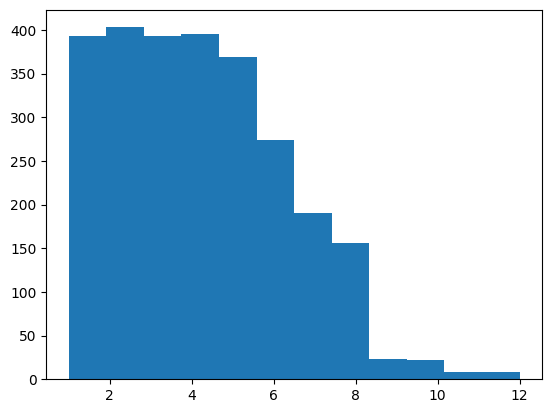

In [15]:
target_var = 'Rank'
y = train[target_var]
plt.hist(y, bins=12)

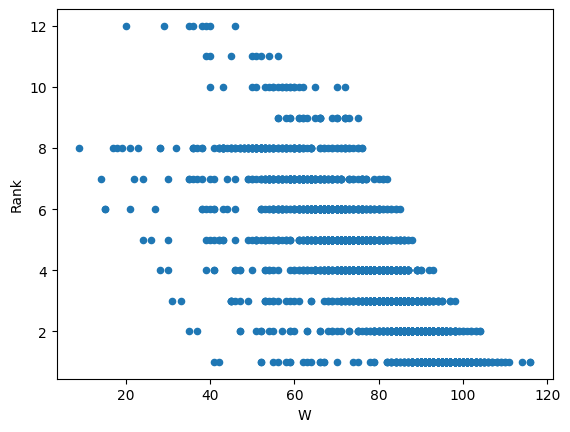

In [20]:
# Comparing number of wins to what they are ranked
ax1 = data.plot.scatter(x='W', y='Rank')

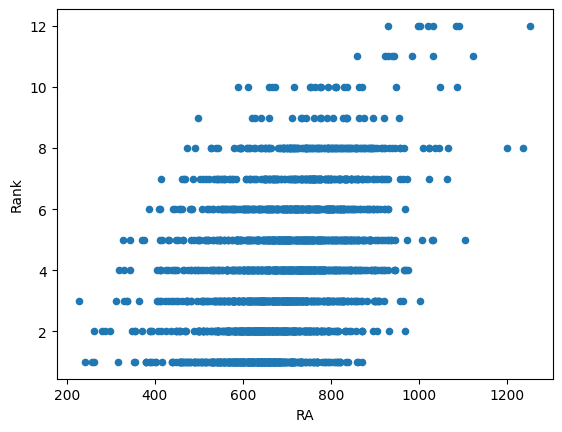

In [66]:
# Comparing number of runs they allowed with where they are ranked
ax2 = data.plot.scatter(x='RA', y='Rank')

In [ ]:
test = test.drop(columns=[target_var])
test.columns

Index(['yearID', 'teamID', 'franchID', 'G', 'Ghome', 'W', 'L', 'DivWin',
       'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO',
       'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'IPouts',
       'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP', 'name', 'attendance', 'BPF',
       'PPF'],
      dtype='object')

In [ ]:
X = train.drop(target_var, axis=1)
y = train[target_var]

In [ ]:
cols = ['G', 'W', 'L', 'R', 'H', 'HR', 'SO', 'RA', 'ERA', 'SHO', 'SV', 'HRA', 'E', 'FP']
X = X[cols]

X.head(5)

,G,W,L,R,H,HR,SO,RA,ERA,SHO,SV,HRA,E,FP
50,70,39,31,471,723,9,98.0,450,2.51,3,7,7,422,0.86
51,66,52,14,624,926,8,45.0,257,1.76,9,4,6,282,0.89
52,65,9,56,238,555,4,136.0,579,3.62,0,0,9,469,0.84
53,69,47,21,429,711,2,78.0,261,1.67,11,0,2,337,0.88
54,69,30,36,280,641,6,98.0,344,1.69,5,0,3,396,0.87


In [ ]:
Xtr, Xval, ytr, yval = train_test_split(X, y, random_state=21, test_size=0.25)
Xtr.shape, Xval.shape, ytr.shape, yval.shape

((1975, 14), (659, 14), (1975,), (659,))

In [ ]:
lr = LinearRegression()
lr.fit(Xtr, ytr)
score_tr = lr.score(Xtr, ytr)
score_val = lr.score(Xval, yval)

score_tr, score_val

(0.7886035015764565, 0.7749063428349854)

In [ ]:
X.shape

(2634, 14)

In [ ]:
predict = lr.predict(X)

In [ ]:
len(predict)

2634

(array([  5.,  65., 333., 622., 639., 500., 275., 131.,  48.,  13.,   1.,
          2.]),
 array([-1.93423857, -0.63201316,  0.67021225,  1.97243765,  3.27466306,
         4.57688846,  5.87911387,  7.18133927,  8.48356468,  9.78579008,
        11.08801549, 12.39024089, 13.6924663 ]),
 <BarContainer object of 12 artists>)

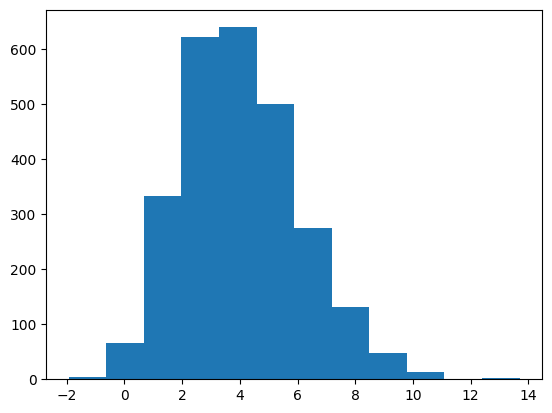

In [ ]:
plt.hist(predict, bins = 12)

In [ ]:
X2 = train.drop(target_var, axis=1)
y2 = train[target_var]

In [ ]:
cols = ['G', 'W', 'L', 'R', 'SO', 'SHO', 'HRA', 'E', 'FP']
X2 = X[cols]

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

mod = DecisionTreeClassifier(random_state=21, criterion='gini', max_depth=5)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=21, test_size=0.25)
mod.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=5, random_state=21)

In [ ]:
from sklearn.metrics import accuracy_score
y2_pred_rank = mod.predict(X2_test)
print(f'Accuracy: {accuracy_score(y2_test, y2_pred_rank)}')

Accuracy: 0.4537177541729894


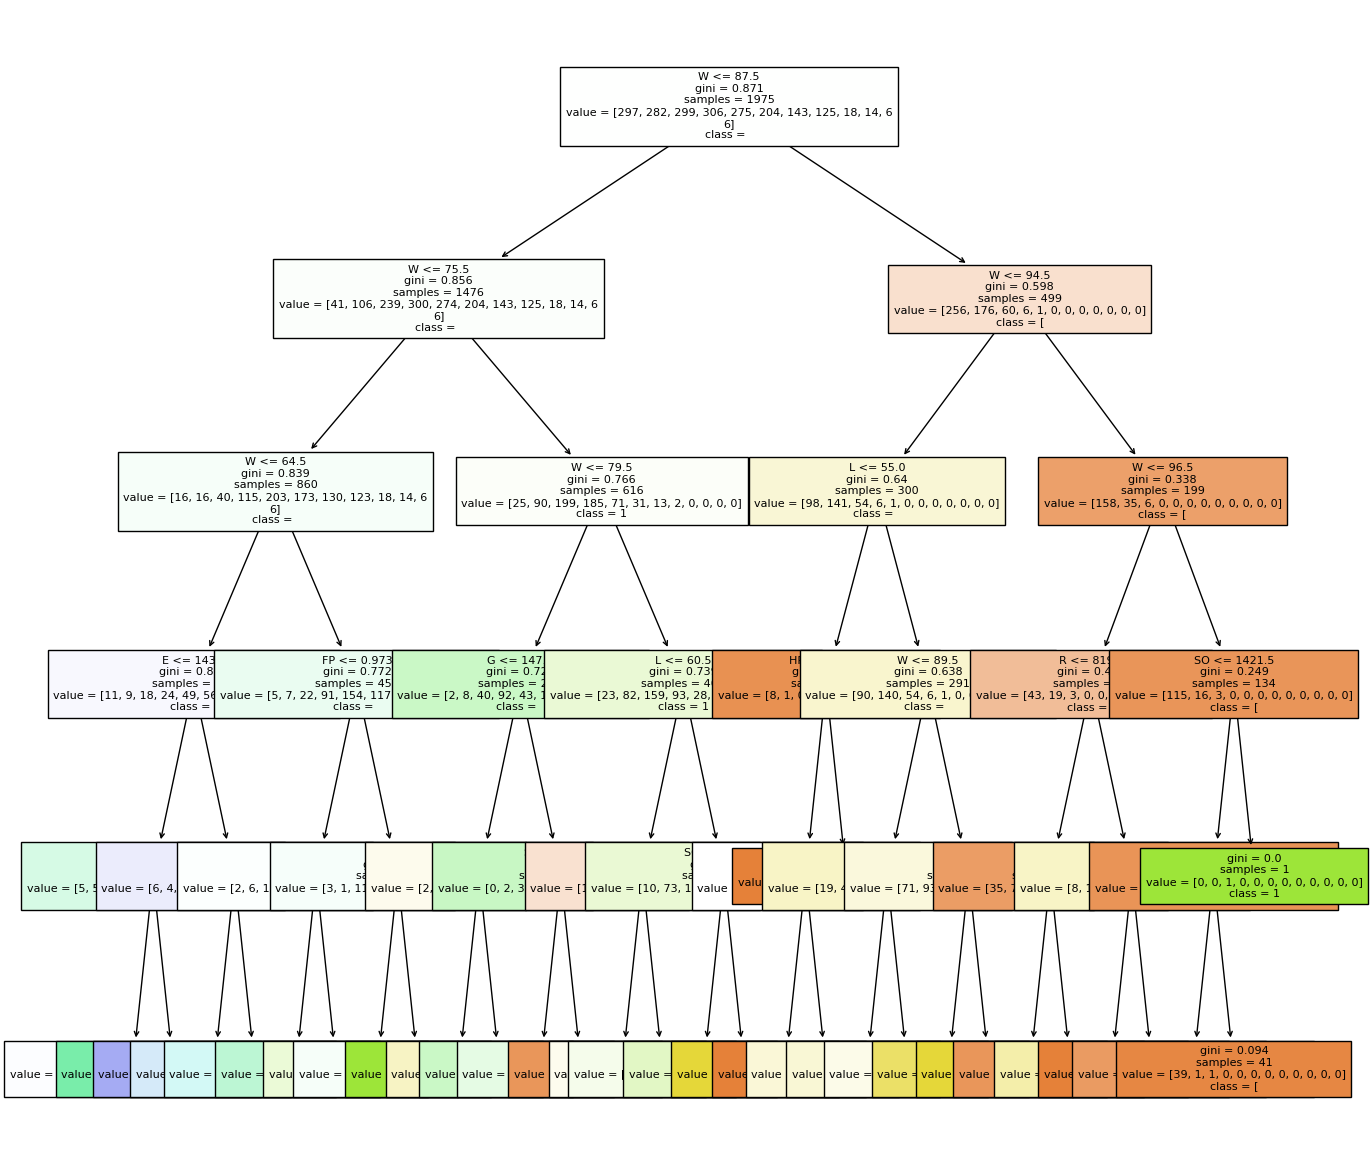

In [ ]:
class_names = str(mod.classes_)
plt.figure(figsize=(15, 15))
tree.plot_tree(mod, filled=True, feature_names=mod.feature_names_in_, class_names=class_names, fontsize=8)
plt.show()